# SVM

In [78]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

### A function to show obs on a scatterplot and SVM boundaries

In [80]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10,5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)     
    
    my_dict = {-1:'b', 1:'r', 0:'g'}
    colors = np.vectorize(my_dict.get)(y)
    plt.scatter(X[:,0], X[:,1], s=30, c=colors, alpha=0.7)

    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], color='k',
                marker = 'x', s=30,linewidths=1) 
                #cmap = mpl.cm.Paired
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.grid()
    print('Number of support vectors: ', svc.support_.size)

In [81]:
# X and y must be arrays

### Dataset with non-linearly separable classes

In [82]:
df = pd.read_csv('data1.csv')
df[:5]

,x1,x2,y
0,0.441227,-0.330870,1
1,2.430771,-0.252092,1
2,0.109610,1.582481,1
3,-0.909232,-0.591637,1
4,0.187603,-0.329870,1


In [83]:
df.shape

(40, 3)

In [84]:
# first 20 rows are train set
df_train = df[:20]
df_test = df[-20:]

In [85]:
y_train = df_train.y
y_test = df_test.y
y_train.value_counts()

 1    10
-1    10
Name: y, dtype: int64

In [86]:
X_train = df_train.drop(['y'],axis=1)
X_test = df_test.drop(['y'],axis=1)

In [87]:
# transform to arrays
X_train = X_train.values
X_test = X_test.values

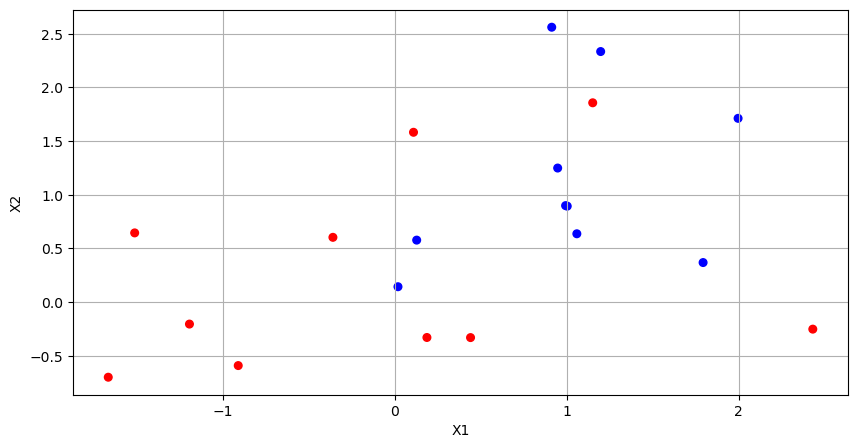

In [88]:
# scatterplot of the train set
colors = np.where(y_train > 0, 'r', 'b')
plt.figure(figsize=(10,5))
plt.scatter(df_train.x1,df_train.x2,s=30,c=colors)
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()

In [89]:
# not linearly separable

### fit a SVC with linear boundary and C=1

Number of support vectors:  13


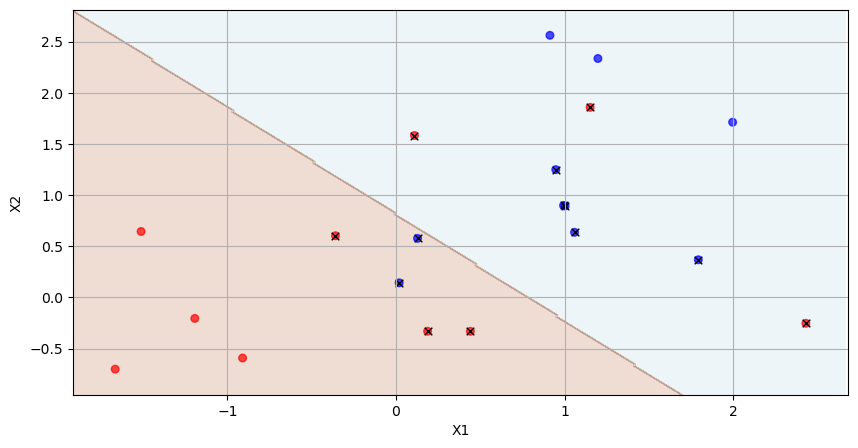

In [90]:
svc = SVC(C=1,kernel='linear')
svc.fit(X_train,y_train)
plot_svc(svc,X_train,y_train)

In [91]:
# region assigned to the -1 class is blue
# region assigned to the 1 class is brown

In [92]:
# s.vectors within margins are shown as X

In [93]:
# identify support vectors

In [94]:
svc.support_

array([10, 11, 13, 14, 15, 16, 17,  0,  1,  2,  4,  6,  8], dtype=int32)

In [95]:
df_train.iloc[list(svc.support_)]

,x1,x2,y
10,0.019392,0.143147,-1
11,0.128121,0.577492,-1
13,1.059144,0.636689,-1
14,1.003289,0.894070,-1
15,1.793053,0.368428,-1
16,0.993805,0.898932,-1
17,0.947692,1.249218,-1
0,0.441227,-0.330870,1
1,2.430771,-0.252092,1
2,0.109610,1.582481,1


#### decrease cost to C=0.10

Number of support vectors:  16


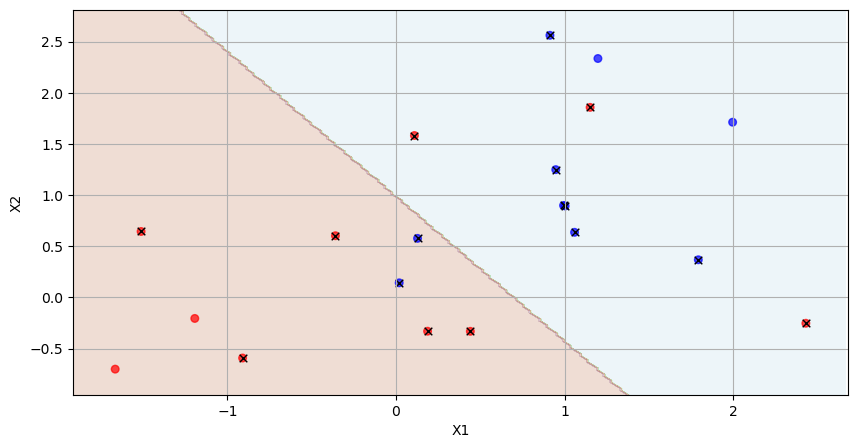

In [96]:
svc2 = SVC(C=0.1,kernel='linear')
svc2.fit(X_train,y_train)
plot_svc(svc2,X_train,y_train)

In [97]:
# decreasing cost C, increases the margin

### GridSearchCV to find best C

In [98]:
param_grid={'C':[0.001,0.01,0.1,5,10,100]}

In [99]:
kfold = StratifiedKFold(n_splits=5,shuffle = True, random_state = 1)

In [100]:
clf = GridSearchCV(SVC(kernel='linear'),param_grid,
                   cv=kfold, scoring = 'accuracy')
clf.fit(X_train,y_train);

In [101]:
# best C
clf.best_params_

{'C': 0.001}

In [102]:
# Scatterplot of test data

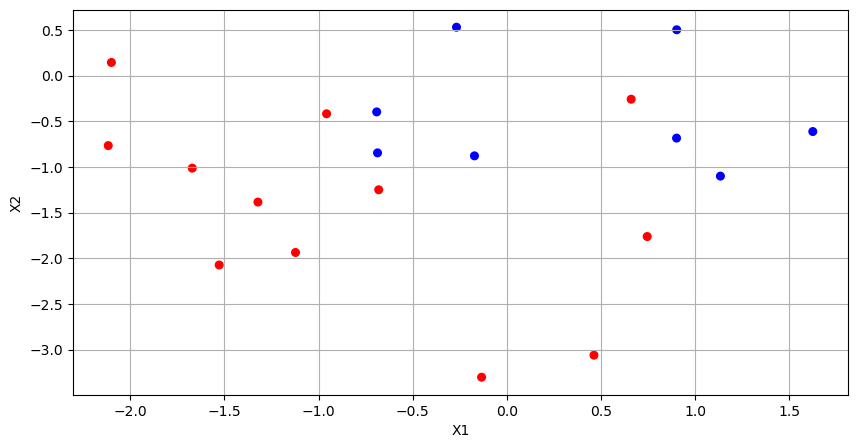

In [103]:
colors = np.where(y_test > 0, 'r', 'b')
plt.figure(figsize=(10,5))
plt.scatter(df_test.x1,df_test.x2,s=30,c=colors)
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()

In [104]:
# test performance

Number of support vectors:  20


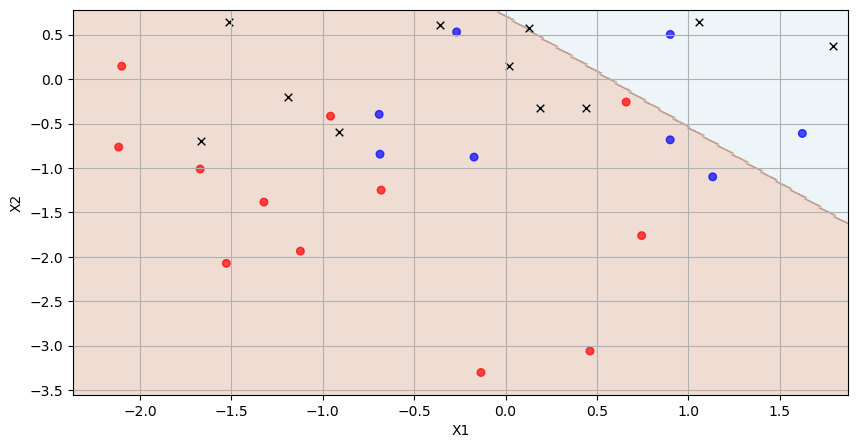

In [105]:
svc2 = SVC(C=0.001,kernel='linear')
svc2.fit(X_train,y_train);
plot_svc(svc2,X_test,y_test)

In [106]:
y_pred = svc2.predict(X_test)
pd.crosstab(y_test,y_pred,
             rownames = ['y'],
             colnames = ['y_pred'])

y_pred,-1,1
y,,
-1,2,6
1,0,12


In [107]:
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test,y_pred),
             index=svc2.classes_,
             columns=svc2.classes_)

,-1,1
-1,2,6
1,0,12


In [108]:
# dataframe with response and predictions (test set)

In [109]:
df1 = pd.DataFrame()
df1['y_test']=y_test
df1['y_pred']=y_pred
df1

,y_test,y_pred
20,-1,-1
21,1,1
22,1,1
23,1,1
24,1,1
25,1,1
26,1,1
27,-1,1
28,-1,1
29,1,1


In [110]:
# misclassified rows

In [111]:
df1[y_test != y_pred]

,y_test,y_pred
27,-1,1
28,-1,1
32,-1,1
34,-1,1
35,-1,1
36,-1,1


In [112]:
# 14 of the test observations are correctly misclassified

### linearly separable classes

In [113]:
df2 = pd.read_csv('data2.csv')
df2_test = df2[-20:]

In [114]:
y_test = df2_test.y
y_test.value_counts()

 1    12
-1     8
Name: y, dtype: int64

In [115]:
X_test = df2_test.drop(['y'],axis=1)
X_test = X_test.values

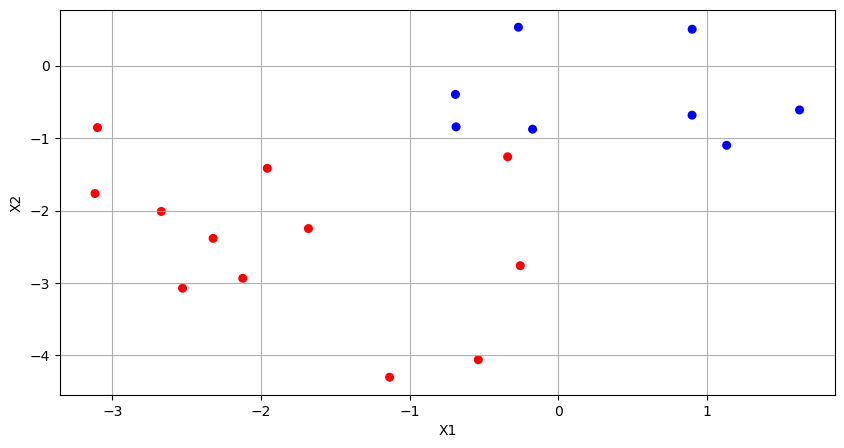

In [116]:
# scatterplot of the test set
plt.figure(figsize=(10,5))
colors = np.where(y_test > 0, 'r', 'b')
plt.scatter(df2_test.x1,df2_test.x2,s=30,c=colors)
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()

In [117]:
# increase the cost C=1e5 to get small margin

Number of support vectors:  3


<Figure size 1200x600 with 0 Axes>

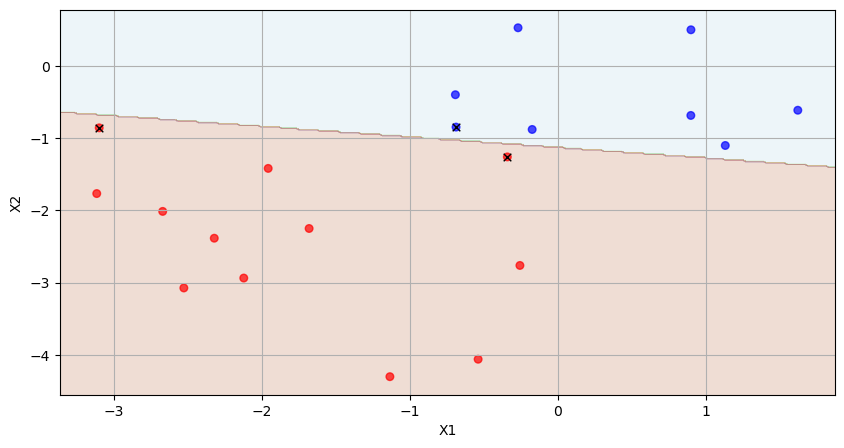

In [118]:
plt.figure(figsize=(12,6))
svc3 = SVC(C=1e5,kernel='linear')
svc3.fit(X_test,y_test)
plot_svc(svc3,X_test,y_test);

In [119]:
# the margin is very narrow

In [120]:
# decrease the cost C=1 to get wider margins

Number of support vectors:  5


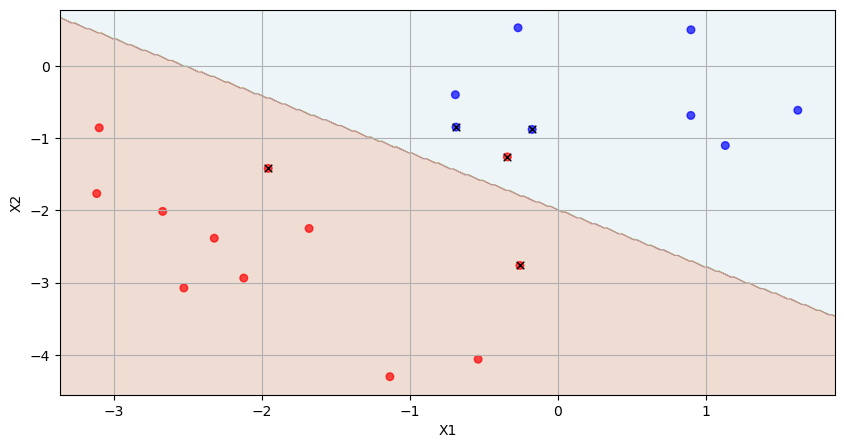

In [121]:
svc4 = SVC(C=1,kernel='linear')
svc4.fit(X_test,y_test)
plot_svc(svc4,X_test,y_test)

In [122]:
# margin is wider and one obs is misclassified

## SVM -nonlinear boundary

In [123]:
# data with a nonlinear boundary

In [124]:
df3 = pd.read_csv('data3.csv')
df3.shape

(200, 3)

In [125]:
y = df3.y
X = df3.drop(['y'],axis=1)

In [126]:
y.value_counts()

-1    150
 1     50
Name: y, dtype: int64

In [127]:
colors = np.where(y > 0, 'r', 'b')

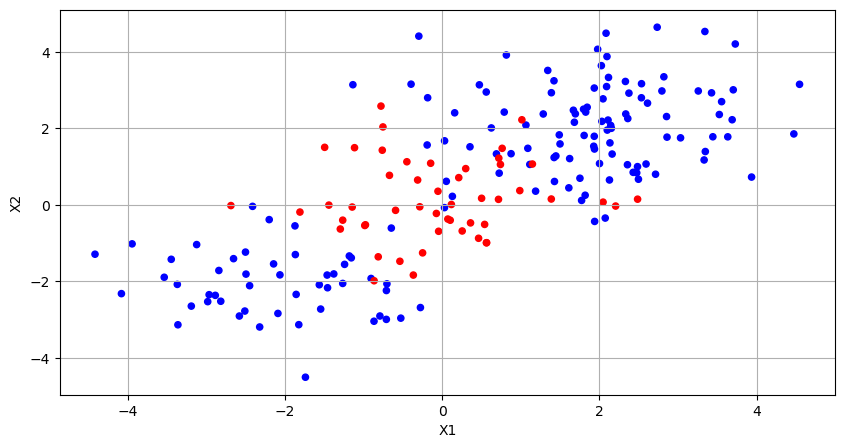

In [128]:
plt.figure(figsize=(10,5))
plt.scatter(df3.x1,df3.x2,s=20,c=colors)
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()

In [129]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y,
                                                 test_size=0.50,
                                                 random_state=2)

In [130]:
# transform df to arrays
X_train = X_train.values
X_test = X_test.values

Number of support vectors:  61


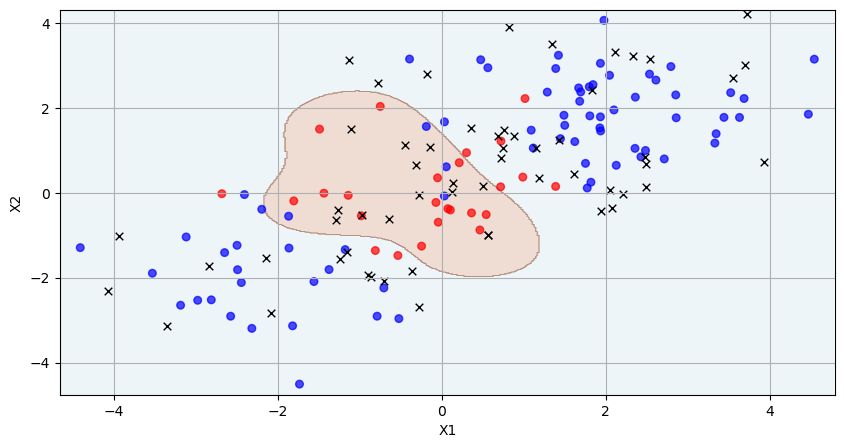

In [131]:
svm = SVC(C=1,kernel='rbf',gamma=1.0)
svm.fit(X_train,y_train);
plot_svc(svm,X_test,y_test)

In [132]:
# increase cost C=10 to decrease the margin

Number of support vectors:  52


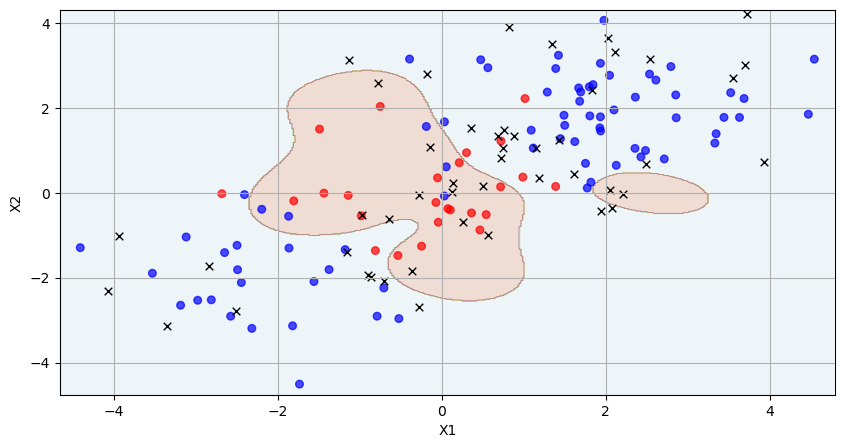

In [133]:
svm2 = SVC(C=10,kernel='rbf',gamma=1)
svm2.fit(X_train,y_train)
plot_svc(svm2,X_test,y_test)

In [134]:
# more irregular decision boundary

## Search for the best cost and gamma

In [135]:
param_grid= {'C':[0.01,0.1,1,10],
             'gamma':[0.5,1,2,3]}

In [136]:
kfold = StratifiedKFold(n_splits=5,shuffle = True, random_state = 1)

In [137]:
clf = GridSearchCV(SVC(kernel='rbf'),param_grid,
                   cv=kfold, scoring='accuracy')
clf.fit(X_train,y_train);

In [138]:
clf.best_params_

{'C': 10, 'gamma': 1}

Number of support vectors:  52


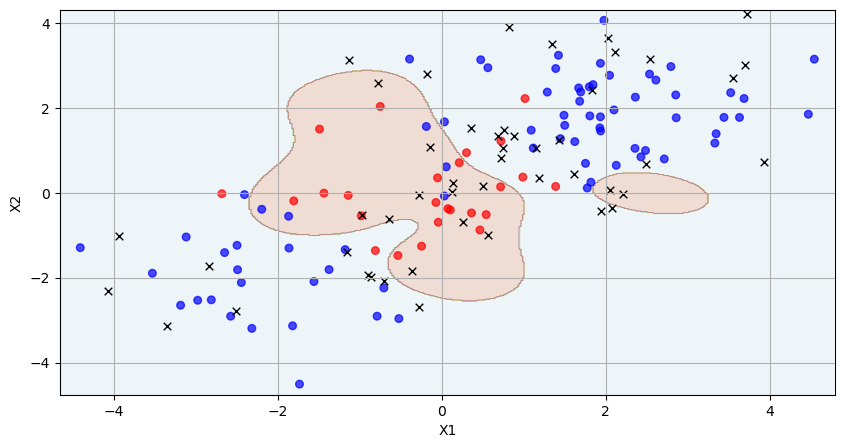

In [139]:
plot_svc(clf.best_estimator_,X_test,y_test)

In [140]:
# test accuracy rate

In [141]:
y_pred = clf.best_estimator_.predict(X_test)
pd.crosstab(y_test,y_pred,
             rownames = ['y'],
             colnames = ['y_pred'])

y_pred,-1,1
y,,
-1,70,5
1,7,18


In [142]:
clf.best_estimator_.score(X_test,y_test)

0.88

In [143]:
y_pred = clf.best_estimator_.predict(X_test)
pd.DataFrame(confusion_matrix(y_test,y_pred),
             index=clf.best_estimator_.classes_,
             columns=clf.best_estimator_.classes_)

,-1,1
-1,70,5
1,7,18


In [144]:
clf.best_estimator_.score(X_test,y_test)

0.88

## SVM with Multiple Classes

In [145]:
# The svm() function performs multi-class classification 
# using the one-versus-one approach

In [146]:
df4 = pd.read_csv('data4.csv')
df4[:5]

,x1,x2,y,color
0,2.091205,3.091283,-1,r
1,0.053030,0.613650,-1,r
2,-0.296492,4.409834,-1,r
3,3.727836,4.204556,-1,r
4,2.794828,2.976421,-1,r


In [147]:
df4.shape

(250, 4)

In [148]:
y = df4.y
y.value_counts()

-1    150
 1     50
 0     50
Name: y, dtype: int64

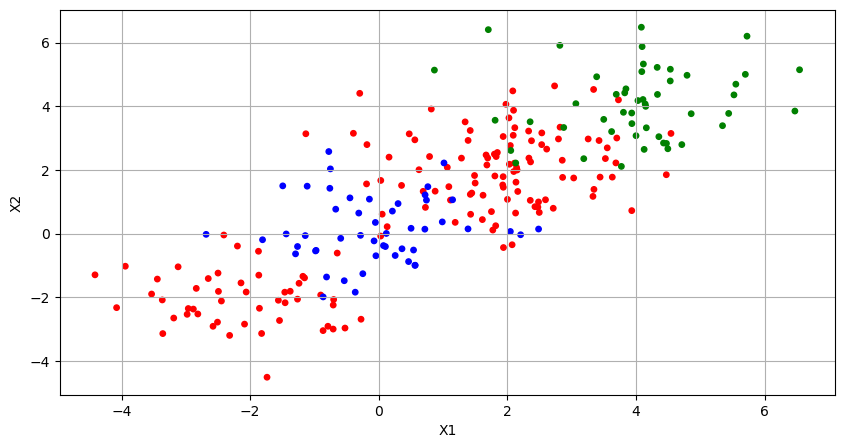

In [149]:
colors = df4.color
plt.figure(figsize=(10,5))
plt.scatter(df4.x1,df4.x2,s=15,c=colors)
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()

In [150]:
list1 = ['y','color']
X = df4.drop(list1,axis=1)

In [151]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y,
                                                 test_size=0.50,
                                                 random_state=2)

In [152]:
type(X_train)

pandas.core.frame.DataFrame

In [153]:
# transform to arrays
X_train = X_train.values
X_test = X_test.values

Number of support vectors:  84


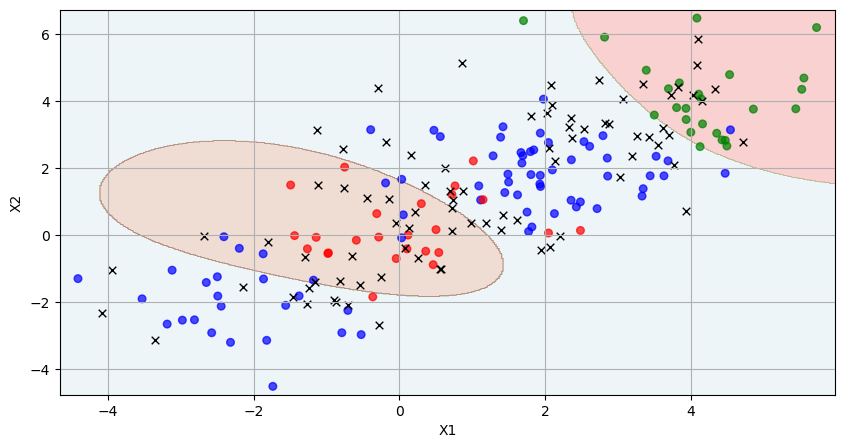

In [154]:
svm5 = SVC(C=1, kernel='rbf',gamma = 'scale')
svm5.fit(X_train,y_train)
plot_svc(svm5,X_test,y_test)

In [155]:
svm5._gamma

0.0902933060590302

Number of support vectors:  87


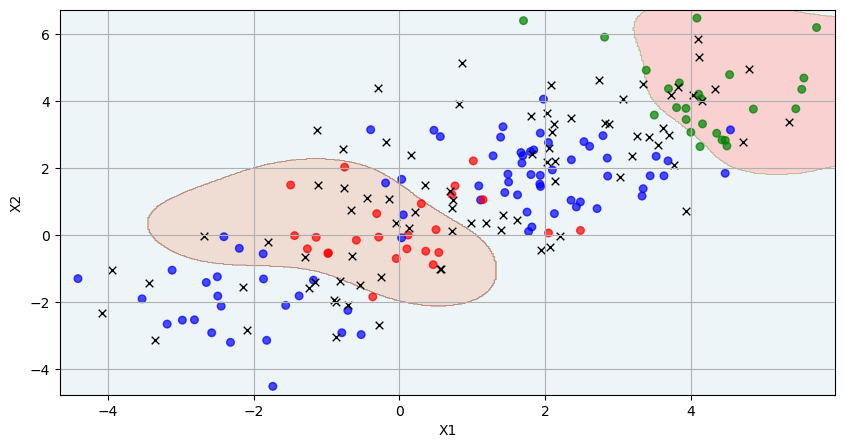

In [156]:
svm5 = SVC(C=1, kernel='rbf',gamma = 'auto')
svm5.fit(X_train,y_train)
plot_svc(svm5,X_test,y_test)

In [157]:
svm5._gamma

0.5

In [158]:
y_pred = svm5.predict(X_test)
pd.crosstab(y_test,y_pred,
             rownames = ['y'],
             colnames = ['y_pred'])

y_pred,-1,0,1
y,,,
-1,68,1,6
0,5,20,0
1,7,0,18


In [348]:
# number of accurate predictions (main diagonal sum)
accuracy_score(y_test, y_pred,normalize=False)

106

In [349]:
# test accuracy rate (out of 125 test observations)
accuracy_score(y_test,y_pred)

0.848

In [350]:
# gridsearch

In [351]:
params = {'C': [0.01, 0.1,0.5,1,2,3,5],
          'gamma': [0.01,0.05,0.1,0.2,0.3]}

In [352]:
grid = GridSearchCV(SVC(kernel = 'rbf'), 
                    params, cv=kfold)
grid.fit(X_train, y_train)
grid.best_params_

{'C': 2, 'gamma': 0.05}

In [353]:
y_pred = grid.best_estimator_.predict(X_test)
pd.crosstab(y_test,y_pred,
             rownames = ['y'],
             colnames = ['y_pred'])

y_pred,-1,0,1
y,,,
-1,66,1,8
0,1,24,0
1,7,0,18


In [ ]:
y_pred = grid.best_estimator_.predict(X_test)

In [354]:
pd.DataFrame(confusion_matrix(y_test,y_pred),
             index=grid.best_estimator_.classes_,
             columns=grid.best_estimator_.classes_)

,-1,0,1
-1,66,1,8
0,1,24,0
1,7,0,18


In [355]:
# number of accurate predictions (main diagonal sum)
accuracy_score(y_test, y_pred,normalize=False)

108

In [356]:
# test accuracy rate (out of 125 test observations)
accuracy_score(y_test,y_pred)

0.864